In [1]:
import numpy as np
import pandas as pd

np.random.seed(42)

# Date range
dates = pd.date_range(start="2023-01-01", end="2024-12-31", freq="D")

# Categories
categories = ["Electronics", "Clothing", "Home Goods"]

data = []
for cat in categories:
    base = {
        "Electronics": 500,
        "Clothing": 300,
        "Home Goods": 400
    }[cat]
    trend = np.linspace(0, 200, len(dates)) if cat == "Electronics" else np.linspace(0, 100, len(dates))
    seasonal = 100 * np.sin(2 * np.pi * dates.dayofyear / 365)
    noise = np.random.normal(0, 50, len(dates))
    sales = base + trend + seasonal + noise
    marketing = sales * np.random.uniform(0.05, 0.15) + np.random.normal(0, 20, len(dates))

    df_temp = pd.DataFrame({
        "date": dates,
        "category": cat,
        "sales": sales,
        "marketing_spend": marketing
    })
    data.append(df_temp)

df = pd.concat(data, ignore_index=True)


KeyboardInterrupt: 

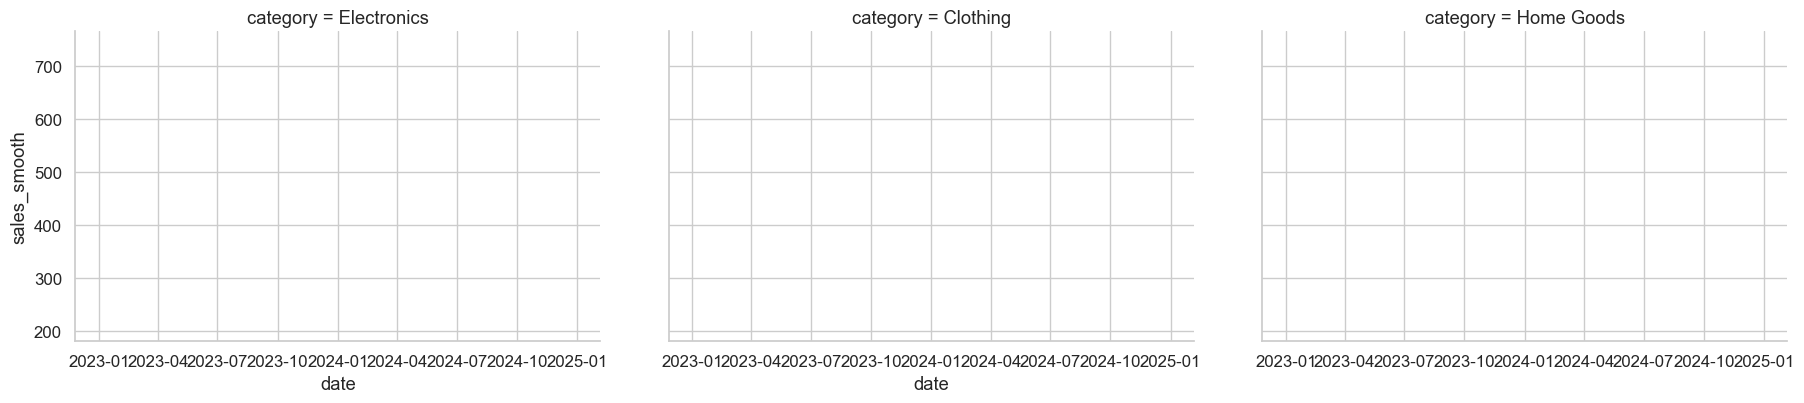

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", font_scale=1.1)

# Rolling mean for smoothing
df["sales_smooth"] = df.groupby("category")["sales"].transform(lambda x: x.rolling(14, min_periods=1).mean())

# Create the facet grid
g = sns.FacetGrid(
    df, col="category", hue="marketing_spend",
    palette="viridis", col_wrap=3, height=4, aspect=1.5
)

# Add sales line
g.map_dataframe(
    sns.lineplot, x="date", y="sales_smooth", color="black", lw=1.5
)

# Add marketing scatter
g.map_dataframe(
    sns.scatterplot, x="date", y="sales", size="marketing_spend", sizes=(10, 200), alpha=0.6
)

# Adjustments
g.set_titles("{col_name}")
g.set_axis_labels("Date", "Daily Sales")
for ax in g.axes.flatten():
    ax.tick_params(axis="x", rotation=45)

g.figure.suptitle("Sales & Marketing Spend Trends by Category (2023–2024)", fontsize=16, y=1.02)
g.add_legend()

plt.tight_layout()
plt.show()


C:\Users\stein\AppData\Local\Temp\ipykernel_26304\530115021.py:80: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


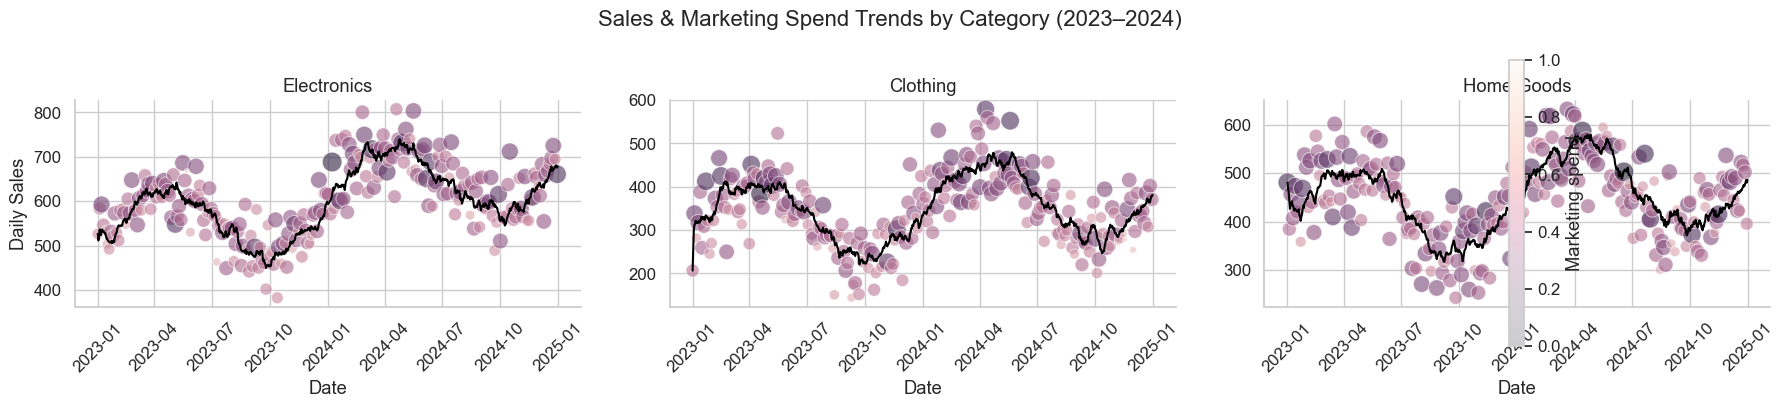

In [3]:
import numpy as np
import pandas as pd

np.random.seed(42)

# Date range
dates = pd.date_range(start="2023-01-01", end="2024-12-31", freq="D")

# Categories
categories = ["Electronics", "Clothing", "Home Goods"]

data = []
for cat in categories:
    base = {"Electronics": 500, "Clothing": 300, "Home Goods": 400}[cat]
    trend = np.linspace(0, 200, len(dates)) if cat == "Electronics" else np.linspace(0, 100, len(dates))
    seasonal = 100 * np.sin(2 * np.pi * dates.dayofyear / 365)
    noise = np.random.normal(0, 50, len(dates))
    sales = base + trend + seasonal + noise
    marketing = sales * np.random.uniform(0.05, 0.15) + np.random.normal(0, 20, len(dates))

    df_temp = pd.DataFrame({
        "date": dates,
        "category": cat,
        "sales": sales,
        "marketing_spend": marketing
    })
    data.append(df_temp)

df = pd.concat(data, ignore_index=True)

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", font_scale=1.1)

# Rolling mean for smoothing
df["sales_smooth"] = df.groupby("category", group_keys=False)["sales"] \
    .transform(lambda x: x.rolling(14, min_periods=1).mean())

# Build the FacetGrid WITHOUT a grid-level hue (much faster)
g = sns.FacetGrid(
    df, col="category", col_wrap=3, height=4, aspect=1.5, sharex=True, sharey=False
)

# Smoothed sales line (fixed color)
g.map_dataframe(
    sns.lineplot, x="date", y="sales_smooth", color="black", lw=1.5
)


# Helper to (optionally) decimate points and draw a rasterized scatter
def _scatter(data, **kws):
    # Light decimation to speed things up; tweak or remove if you want every point
    data = data.iloc[::3]
    sns.scatterplot(
        data=data, x="date", y="sales",
        hue="marketing_spend", size="marketing_spend",
        sizes=(10, 200), alpha=0.6,
        legend=False,  # <-- critical: avoid slow combined legend
        rasterized=True  # <-- big win when rendering/saving
    )


# Draw scatter with continuous encodings only on the artist that uses them
g.map_dataframe(_scatter)

# Titles/labels/rotation
g.set_titles("{col_name}")
g.set_axis_labels("Date", "Daily Sales")
for ax in g.axes.flat:
    ax.tick_params(axis="x", rotation=45)

# Add a fast colorbar for the continuous hue; no size legend
# Find a PathCollection (scatter) to use as the mappable
first_ax_with_scatter = next(ax for ax in g.axes.flat if ax.collections)
mappable = first_ax_with_scatter.collections[0]
cbar = g.figure.colorbar(mappable, ax=g.axes, label="Marketing spend")

g.figure.suptitle("Sales & Marketing Spend Trends by Category (2023–2024)", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()
